In [3]:
!pip install yfinance



  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 50.7 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 187.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 174.0 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=bda0d9e66e273dbbbbef9c92722f4b5f59e31497e030814de8aac531579e54d4
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-linux_x86_64.whl size=303862 sha256=8ed9fb02eaf7a1317bc66fe6b675210c3c6964e503e97397d675d27d42edd81d
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d1/d

In [4]:
# Import required libraries
import yfinance as yf
import pandas as pd

# Create the ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract the full historical stock data
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first 5 rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Get the webpage HTML
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html = requests.get(url).text

# Step 2: Parse HTML with BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Step 3: Locate the revenue table
tables = soup.find_all("table")
tesla_revenue_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue_table = table
        break

# Step 4: Convert the table to a DataFrame
tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]

# Step 5: Clean the data
tesla_revenue = tesla_revenue.rename(columns={"Tesla Quarterly Revenue (Millions of US $)": "Revenue",
                                              "Date": "Date"})
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$","").str.replace(",","")
tesla_revenue = tesla_revenue.dropna()
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

# Step 6: Display the last 5 rows
tesla_revenue.tail()


/tmp/ipykernel_333/1799143771.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]


ImportError: Missing optional dependency 'lxml'.  Use pip or conda to install lxml.

In [6]:
rows = tesla_revenue_table.find_all("tr")
data = []
for row in rows[1:]:
    cols = row.find_all("td")
    cols = [ele.text.strip().replace("$","").replace(",","") for ele in cols]
    if cols:
        data.append(cols)
tesla_revenue = pd.DataFrame(data, columns=["Date","Revenue"])
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')
tesla_revenue = tesla_revenue.dropna()
tesla_revenue.tail()


AttributeError: 'NoneType' object has no attribute 'find_all'

In [7]:
import requests
import pandas as pd
import re
import json

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html = requests.get(url).text

pattern = r"var quarterlyRevenue = (\[.*?\]);"
match = re.search(pattern, html, re.DOTALL)

data = json.loads(match.group(1))

tesla_revenue = pd.DataFrame(data)
tesla_revenue.columns = ["Date", "Revenue"]

tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"].str.replace(",","").str.replace("$",""), errors='coerce')
tesla_revenue = tesla_revenue.dropna()

tesla_revenue.tail()


AttributeError: 'NoneType' object has no attribute 'group'

In [8]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
financials = tesla.financials

revenue = financials.loc['Total Revenue']

tesla_revenue = revenue.transpose()
tesla_revenue.columns = ['Revenue']

tesla_revenue.tail()


2024-12-31    9.769000e+10
2023-12-31    9.677300e+10
2022-12-31    8.146200e+10
2021-12-31    5.382300e+10
2020-12-31             NaN
Name: Total Revenue, dtype: float64

In [9]:
import yfinance as yf
import pandas as pd

gme = yf.Ticker("GME")
gme_data = gme.history(period="max") 

gme_data.reset_index(inplace=True)

gme_data.to_csv("gme_stock_data.csv", index=False)

gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [10]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url)
html_content = response.text

soup = BeautifulSoup(html_content, "html.parser")

table = soup.find("table", {"class": "historical_data_table table"})

rows = table.find_all("tr")

dates = []
revenues = []

for row in rows[1:]:  
    cols = row.find_all("td")
    if len(cols) > 1:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(",", "").replace("$", "")
        dates.append(date)
        revenues.append(revenue)

gme_revenue = pd.DataFrame({
    "Date": dates,
    "Revenue": revenues
})

gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')

gme_revenue.tail()


AttributeError: 'NoneType' object has no attribute 'find_all'

In [11]:
import yfinance as yf
import pandas as pd

gme = yf.Ticker("GME")
financials = gme.financials

revenue = financials.loc['Total Revenue']

gme_revenue = revenue.transpose()
gme_revenue.columns = ['Revenue']

gme_revenue.tail()


2025-01-31    3.823000e+09
2024-01-31    5.272800e+09
2023-01-31    5.927200e+09
2022-01-31    6.010700e+09
2021-01-31             NaN
Name: Total Revenue, dtype: float64

In [12]:
import plotly.graph_objects as go

def make_graph(stock_data, revenue_data, stock_name):
    fig = go.Figure()

    # Stock price trace
    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data['Close'],
        name=f"{stock_name} Stock Price",
        line=dict(color='blue')
    ))

    # Revenue trace
    fig.add_trace(go.Scatter(
        x=revenue_data['Date'],
        y=revenue_data['Revenue'],
        name=f"{stock_name} Revenue",
        line=dict(color='red'),
        yaxis="y2"
    ))

    # Layout with secondary y-axis
    fig.update_layout(
        title=f"{stock_name} Stock Price vs Revenue",
        xaxis_title="Date",
        yaxis=dict(title="Stock Price (USD)"),
        yaxis2=dict(title="Revenue (USD)", overlaying="y", side="right"),
        legend=dict(x=0, y=1.1, orientation="h")
    )

    fig.show()

# Plot Tesla
make_graph(tesla_data, tesla_revenue, "Tesla")

KeyError: 'Date'

In [13]:
# ==========================
# Question 5: Tesla Stock vs Revenue Graph
# ==========================
import plotly.graph_objects as go

# Define the graphing function
def make_graph(stock_data, revenue_data, stock_name):
    fig = go.Figure()

    # Stock price trace
    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data['Close'],
        name=f"{stock_name} Stock Price",
        line=dict(color='blue')
    ))

    # Revenue trace
    fig.add_trace(go.Scatter(
        x=revenue_data['Date'],
        y=revenue_data['Revenue'],
        name=f"{stock_name} Revenue",
        line=dict(color='red'),
        yaxis="y2"
    ))

    # Layout with secondary y-axis
    fig.update_layout(
        title=f"{stock_name} Stock Price vs Revenue",
        xaxis_title="Date",
        yaxis=dict(title="Stock Price (USD)"),
        yaxis2=dict(title="Revenue (USD)", overlaying="y", side="right"),
        legend=dict(x=0, y=1.1, orientation="h")
    )

    fig.show()

# Call the function to plot Tesla
make_graph(tesla_data, tesla_revenue, "Tesla")


KeyError: 'Date'

In [14]:
import plotly.graph_objects as go
import pandas as pd

# Asegurarse de que las columnas estén correctas
tesla_revenue = tesla_revenue.rename(columns={'index': 'Date'})
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Definir la función para graficar
def make_graph(stock_data, revenue_data, stock_name):
    fig = go.Figure()

    # Stock price trace
    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data['Close'],
        name=f"{stock_name} Stock Price",
        line=dict(color='blue')
    ))

    # Revenue trace
    fig.add_trace(go.Scatter(
        x=revenue_data['Date'],
        y=revenue_data['Revenue'],
        name=f"{stock_name} Revenue",
        line=dict(color='red'),
        yaxis="y2"
    ))

    # Layout con eje secundario
    fig.update_layout(
        title=f"{stock_name} Stock Price vs Revenue",
        xaxis_title="Date",
        yaxis=dict(title="Stock Price (USD)"),
        yaxis2=dict(title="Revenue (USD)", overlaying="y", side="right"),
        legend=dict(x=0, y=1.1, orientation="h")
    )

    fig.show()

# Graficar Tesla
make_graph(tesla_data, tesla_revenue, "Tesla")


TypeError: Series.rename() got an unexpected keyword argument 'columns'

In [16]:
import plotly.graph_objects as go
import pandas as pd

# Convertir tesla_revenue a DataFrame correctamente
tesla_revenue = tesla_revenue.reset_index()
tesla_revenue.columns = ['Date', 'Revenue']

# Convertir Date a datetime
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Definir la función para graficar
def make_graph(stock_data, revenue_data, stock_name):
    fig = go.Figure()

    # Stock price trace
    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data['Close'],
        name=f"{stock_name} Stock Price",
        line=dict(color='blue')
    ))

    # Revenue trace
    fig.add_trace(go.Scatter(
        x=revenue_data['Date'],
        y=revenue_data['Revenue'],
        name=f"{stock_name} Revenue",
        line=dict(color='red'),
        yaxis="y2"
    ))

    # Layout con eje secundario
    fig.update_layout(
        title=f"{stock_name} Stock Price vs Revenue",
        xaxis_title="Date",
        yaxis=dict(title="Stock Price (USD)"),
        yaxis2=dict(title="Revenue (USD)", overlaying="y", side="right"),
        legend=dict(x=0, y=1.1, orientation="h")
    )

    fig.show()

# Graficar Tesla
make_graph(tesla_data, tesla_revenue, "Tesla")


ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

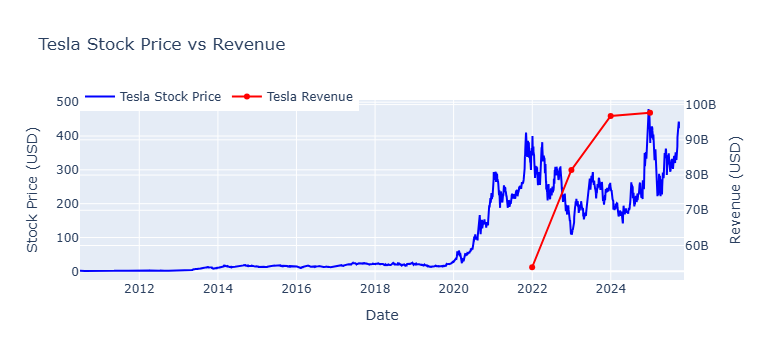

In [17]:
import plotly.graph_objects as go
import pandas as pd
import yfinance as yf

# -----------------------------
# Obtener Tesla stock y revenue
# -----------------------------
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max").reset_index()

# Revenue como DataFrame
tesla_revenue = tesla.financials.loc['Total Revenue'].transpose().reset_index()
tesla_revenue = tesla_revenue[['index', 'Total Revenue']]  # solo dos columnas
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# -----------------------------
# Definir la función para graficar
# -----------------------------
def make_graph(stock_data, revenue_data, stock_name):
    fig = go.Figure()

    # Stock price trace
    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data['Close'],
        name=f"{stock_name} Stock Price",
        line=dict(color='blue')
    ))

    # Revenue trace
    fig.add_trace(go.Scatter(
        x=revenue_data['Date'],
        y=revenue_data['Revenue'],
        name=f"{stock_name} Revenue",
        line=dict(color='red'),
        yaxis="y2"
    ))

    # Layout con eje secundario
    fig.update_layout(
        title=f"{stock_name} Stock Price vs Revenue",
        xaxis_title="Date",
        yaxis=dict(title="Stock Price (USD)"),
        yaxis2=dict(title="Revenue (USD)", overlaying="y", side="right"),
        legend=dict(x=0, y=1.1, orientation="h")
    )

    fig.show()

# -----------------------------
# Graficar Tesla
# -----------------------------
make_graph(tesla_data, tesla_revenue, "Tesla")


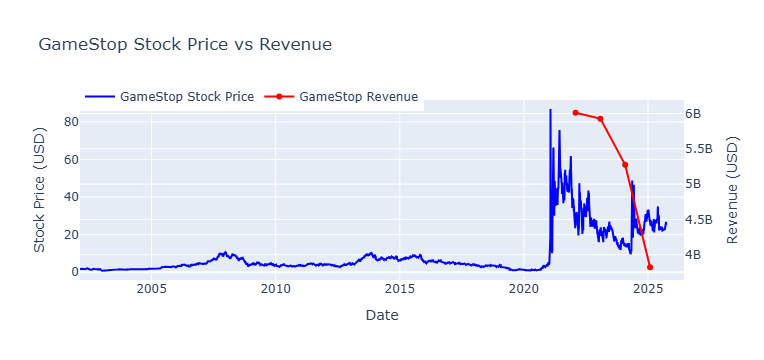

In [19]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

gme = yf.Ticker("GME")
gme_data = gme.history(period="max").reset_index()


gme_revenue = gme.financials.loc['Total Revenue'].transpose().reset_index()
gme_revenue = gme_revenue[['index', 'Total Revenue']]  # solo dos columnas
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_data['Date'] = pd.to_datetime(gme_data['Date'])


def make_graph(stock_data, revenue_data, stock_name):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data['Close'],
        name=f"{stock_name} Stock Price",
        line=dict(color='blue')
    ))

 
    fig.add_trace(go.Scatter(
        x=revenue_data['Date'],
        y=revenue_data['Revenue'],
        name=f"{stock_name} Revenue",
        line=dict(color='red'),
        yaxis="y2"
    ))

    fig.update_layout(
        title=f"{stock_name} Stock Price vs Revenue",
        xaxis_title="Date",
        yaxis=dict(title="Stock Price (USD)"),
        yaxis2=dict(title="Revenue (USD)", overlaying="y", side="right"),
        legend=dict(x=0, y=1.1, orientation="h")
    )

    fig.show()

make_graph(gme_data, gme_revenue, "GameStop")
